In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('Database IND.csv')

In [3]:
DF.head(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


In [4]:
DF.shape

(908, 25)

#### 1st Part, Target variable is capacity_mw

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Lot of null values are present

In [6]:
DF.nunique()#unique elements in each column

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### checking for null values

In [6]:
DF.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have no data, so I will drop them

### Dataset Description

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

`country_long` (text): longer form of the country

`designation name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :  

Make two predictions:   1) Primary Fuel    2) capacity_mw 


#### Getting the basic summary and statistical information of the data.

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

country                   object
country_long              object
name                      object
gppd_idnr                 object
primary_fuel              object
other_fuel1               object
other_fuel2               object
owner                     object
source                    object
url                       object
geolocation_source        object
generation_data_source    object
dtype: object

In [9]:
DF.dtypes[DF.dtypes != 'object']#Identifying the Continuous/discrete Columns

capacity_mw                 float64
latitude                    float64
longitude                   float64
other_fuel3                 float64
commissioning_year          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
estimated_generation_gwh    float64
dtype: object

In [10]:
DF.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in above columns indicates skewness.

#### checking for null values

In [11]:
DF.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [12]:
DF.latitude.isnull().sum()/908*100 

5.066079295154185

In [13]:
DF.longitude.isnull().sum()/908*100 

5.066079295154185

In [14]:
DF.generation_data_source.isnull().sum()/908*100       

50.440528634361236

In [15]:
DF.geolocation_source.isnull().sum()/908*100 

2.092511013215859

In [16]:
DF.other_fuel1.isnull().sum()/908*100 

78.08370044052863

In [17]:
DF.other_fuel2.isnull().sum()/908*100 

99.8898678414097

In [18]:
DF.other_fuel3.isnull().sum()/908*100 

100.0

In [19]:
DF.commissioning_year.isnull().sum()/908*100 

41.85022026431718

In [20]:
DF.owner.isnull().sum()/908*100  

62.33480176211453

In [21]:
DF.wepp_id.isnull().sum()/908*100  

100.0

In [22]:
DF.estimated_generation_gwh.isnull().sum()/908*100  

100.0

In [23]:
DF.year_of_capacity_data.isnull().sum()/908*100  

42.731277533039645

In [25]:
DF.generation_gwh_2013.isnull().sum()/908*100  

57.70925110132159

In [26]:
DF.generation_gwh_2014.isnull().sum()/908*100  

55.837004405286336

In [27]:
DF.generation_gwh_2015.isnull().sum()/908*100  

53.19383259911894

In [28]:
DF.generation_gwh_2016.isnull().sum()/908*100  

51.87224669603524

In [29]:
DF.generation_gwh_2017.isnull().sum()/908*100  

51.2114537444934

#### dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [30]:
DF.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)

In [31]:
DF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [32]:
DF.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)

In [33]:
DF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [35]:
DF.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Uttam Steels ltd                               1
Gangakhed Energy ltd                           1
S J Green Park Energy Private Limited          1
Bharat Refinery ltd                            1
Solaer                                         1
Name: source, Length: 191, dtype: int64

In [36]:
DF.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [37]:
DF.geolocation_source.value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

##### dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [38]:
DF.drop(columns=['generation_data_source','source'],inplace=True)

In [39]:
DF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking for unique categories in the categorical columns with null values

In [40]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
geolocation_source    object
dtype: object

In [41]:
DF.geolocation_source.isnull().sum()

19

In [42]:
DF.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

There are 3 unique categories in geolocation_source.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

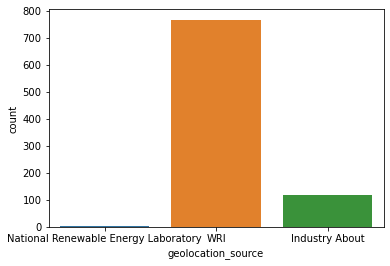

In [43]:
sns.countplot(DF.geolocation_source)

In [44]:
DF.geolocation_source.isnull().sum()/908*100 

2.092511013215859

2.09% of data is null. 

In [45]:
DF.geolocation_source.mode() # most frequently occuring value.

0    WRI
dtype: object

In [46]:
(DF['geolocation_source'] == 'WRI').sum()/DF.geolocation_source.count()*100 #checking the % share of most frequently occuring value.

86.16422947131609

86.16% of geolocation_source data is 'WRI'. 

#### Therefore imputing ' WRI' to NaN values in geolocation_source column

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [49]:
si = si.fit(DF[['geolocation_source']])

In [50]:
DF[['geolocation_source']] = si.transform(DF[['geolocation_source']])

In [51]:
DF[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.

Checking for Null values in continuous / discrete columns.

In [52]:
DF.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [53]:
DF.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [54]:
DF.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
903    77.3568
904    78.1654
905    75.5811
906    73.7477
907    77.4768
Name: longitude, Length: 908, dtype: float64

#### Using KNN Imputation technique for imputing missing data.

In [55]:
from sklearn.impute import KNNImputer

In [56]:
imp = KNNImputer(n_neighbors=2)

In [58]:
DF[['latitude','longitude']] = imp.fit_transform(DF[['latitude','longitude']])

In [59]:
DF[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

There are no more values missing from 'latitude' and 'longitude' columns.

In [60]:
DF.commissioning_year.isnull().sum()/908*100 

41.85022026431718

41.85% of commissioning_year is NaN

In [61]:
DF.commissioning_year.mode()

0    2013.0
dtype: float64

In [62]:
DF.commissioning_year.mode()

0    2013.0
dtype: float64

In [63]:
(DF['commissioning_year'] == 2013.0).sum()/DF.commissioning_year.count()*100 #checking the % share of most frequently occuring value.

5.303030303030303

In [64]:
DF.commissioning_year.mean()

1996.876893939394

In [65]:
DF.commissioning_year.median()

2000.0

In [66]:
(DF['commissioning_year'] == 1996.0).sum()/DF.commissioning_year.count()*100 #checking the % share of mean year value.

2.462121212121212

In [67]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['commissioning_year']])
DF[['commissioning_year']] = si.transform(DF[['commissioning_year']])
DF[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [68]:
DF.commissioning_year = DF.commissioning_year.astype('int64') #converting to int data type.

In [69]:
DF.commissioning_year

0      2011
1      2000
2      2000
3      2004
4      2015
       ... 
903    2016
904    2000
905    2000
906    2000
907    2000
Name: commissioning_year, Length: 908, dtype: int64

In [70]:
DF.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

#### Dropping column year_of_capacity_data as all the values in it are '2018.0'

In [72]:
DF.drop(columns = 'year_of_capacity_data',inplace = True)

In [73]:
DF.shape

(908, 11)

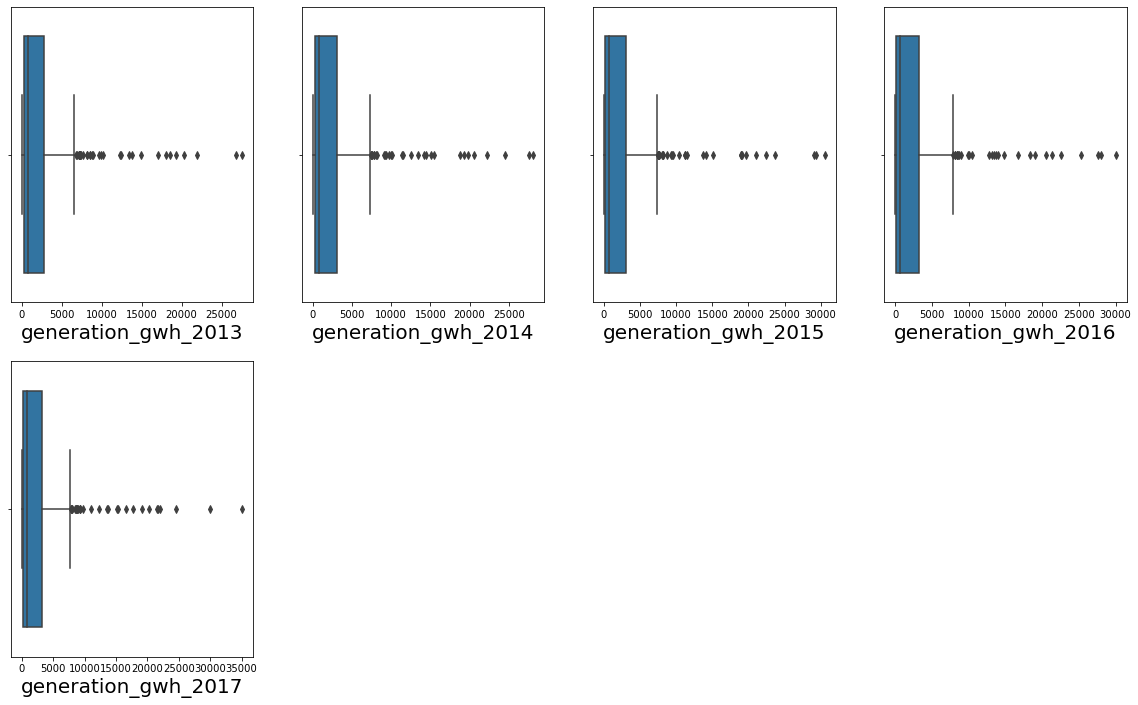

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

outliers exist, therefore imputing with KNN imputation technique.

In [75]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['generation_gwh_2013']])
DF[['generation_gwh_2013']] = si.transform(DF[['generation_gwh_2013']])
DF[['generation_gwh_2013']].isnull().sum()

generation_gwh_2013    0
dtype: int64

In [76]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['generation_gwh_2014']])
DF[['generation_gwh_2014']] = si.transform(DF[['generation_gwh_2014']])
DF[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [77]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['generation_gwh_2015']])
DF[['generation_gwh_2015']] = si.transform(DF[['generation_gwh_2015']])
DF[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [78]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['generation_gwh_2016']])
DF[['generation_gwh_2016']] = si.transform(DF[['generation_gwh_2016']])
DF[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [79]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(DF[['generation_gwh_2017']])
DF[['generation_gwh_2017']] = si.transform(DF[['generation_gwh_2017']])
DF[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [80]:
DF.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

#### There are no more null values in the dataframe.

#### Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.

In [81]:
DF['Age'] = DF['commissioning_year'].apply(lambda y: 2021 - y) 

In [82]:
DF.drop(columns=['commissioning_year'],inplace=True)

In [83]:
DF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,10
1,98.0,24.7663,74.6090,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
2,39.2,21.9038,69.3732,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
3,135.0,23.8712,91.3602,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,17
4,1800.0,21.9603,82.4091,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,6
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,5
904,3.0,12.8932,78.1654,Solar,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,21
905,25.5,15.2758,75.5811,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
906,80.0,24.3500,73.7477,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21


### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the continuous data type Target column

In [84]:
DF.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

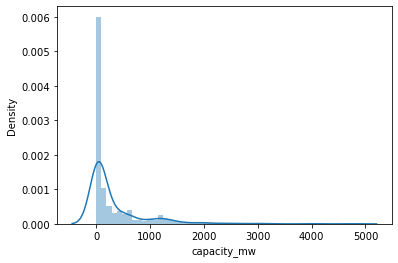

In [85]:
sns.distplot(DF.capacity_mw)

In [86]:
DF.select_dtypes(include = object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [87]:
DF.capacity_mw.skew()

3.1932573023446458

Distribution of data is right skewed.

#### Analyzing Feature columns with Continuous Data.

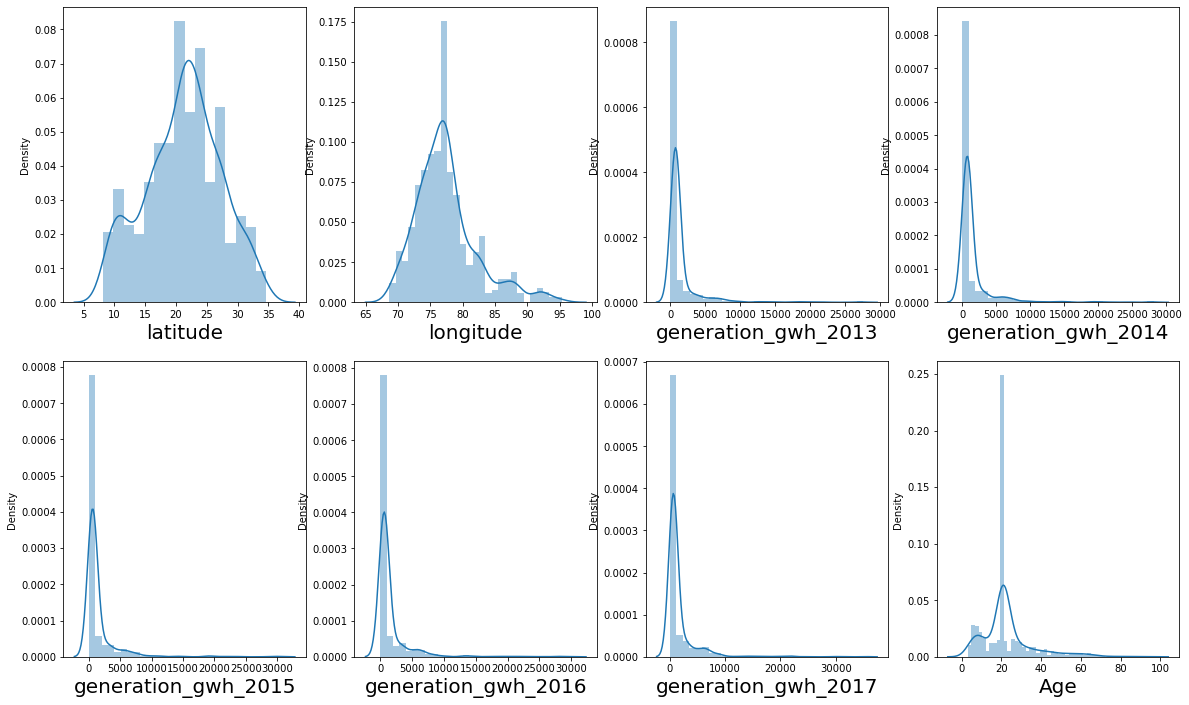

In [88]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed.            

#### capacity_mw vs continuous / discrete data type columns

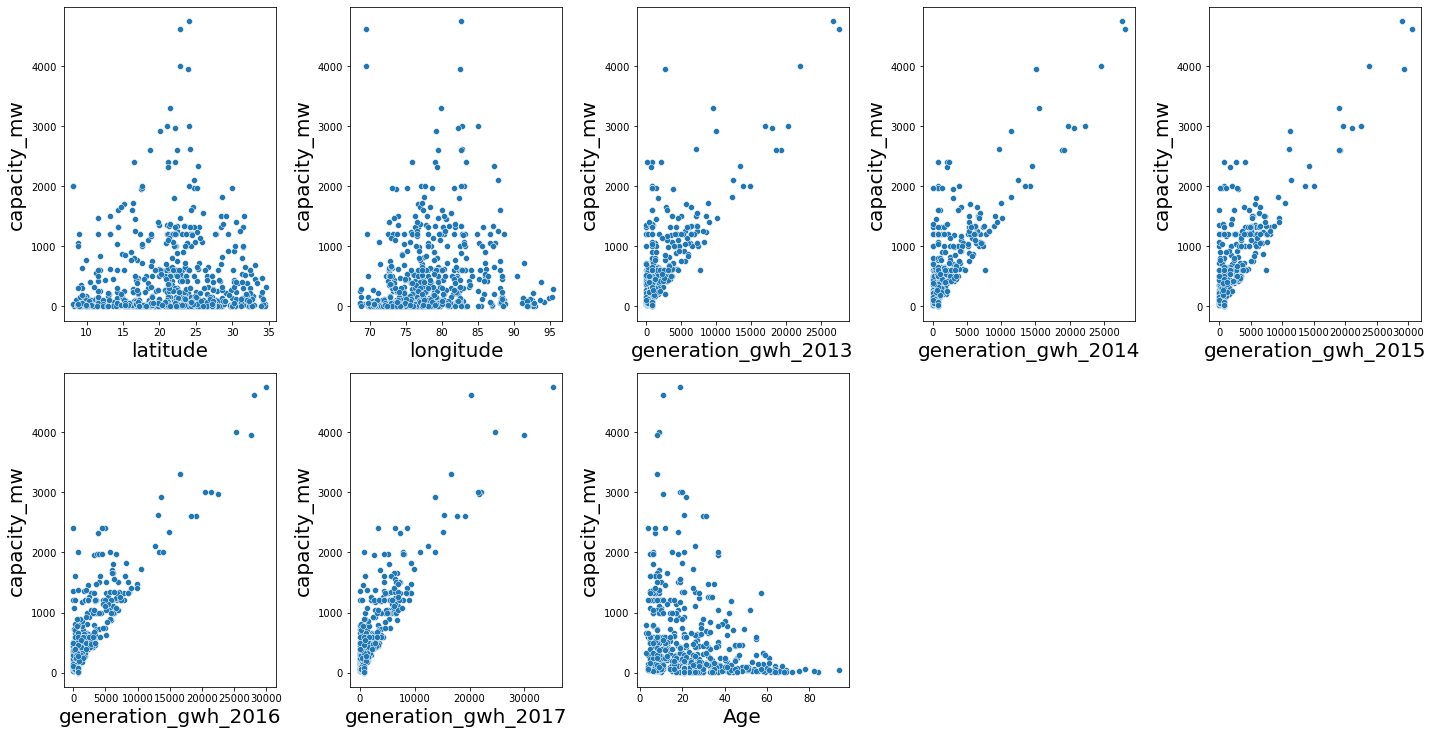

In [89]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['capacity_mw']
X =  DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

<Figure size 432x432 with 0 Axes>

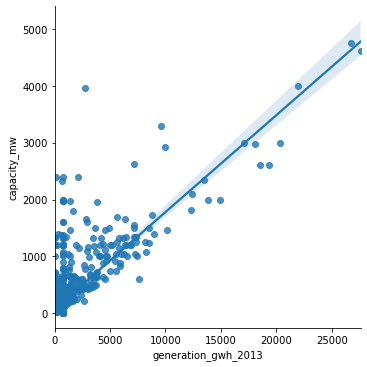

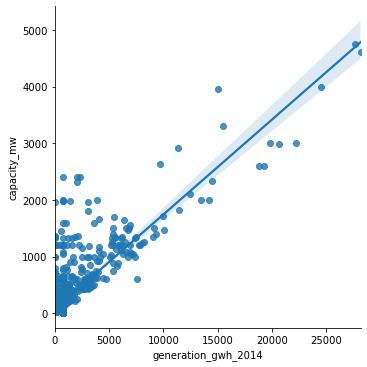

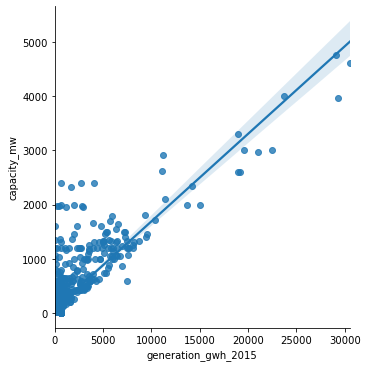

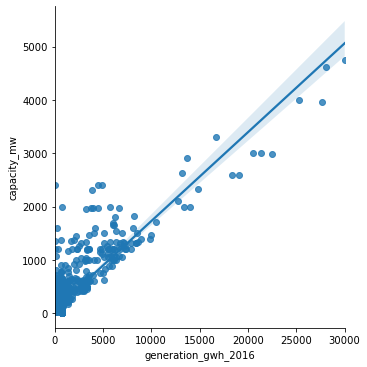

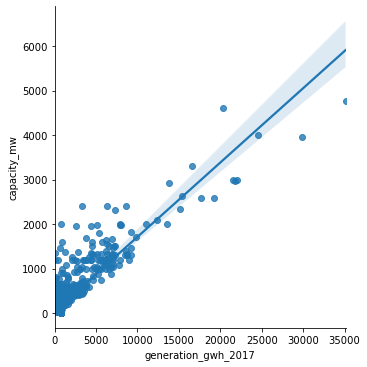

In [91]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = DF)

#### capacity_mw vs categorical data type columns

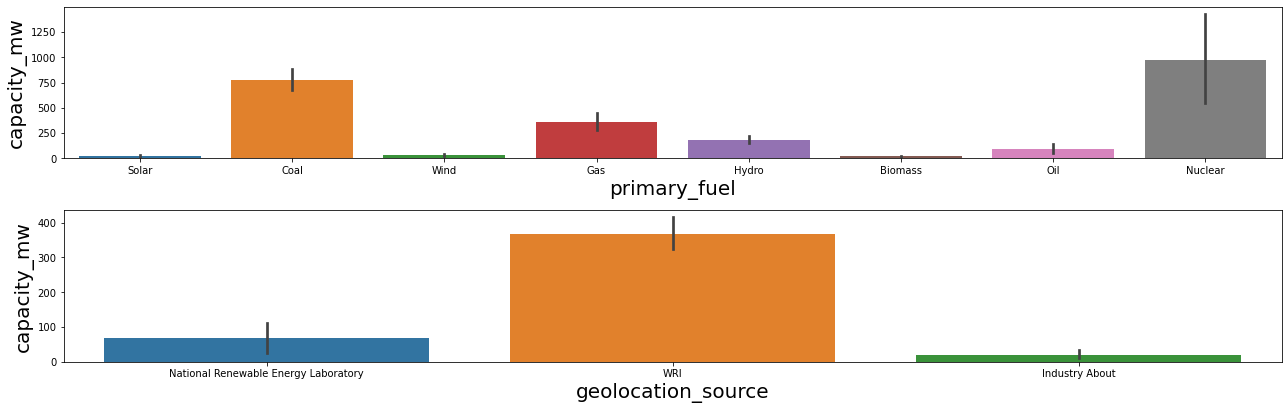

In [92]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = DF['capacity_mw']
X =  DF[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

#### Analyzing the categorical data type Target column

In [93]:
DF.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

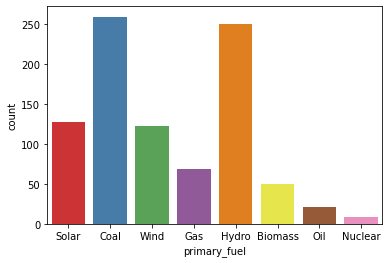

In [94]:
sns.countplot(DF['primary_fuel'], palette="Set1")

In [95]:
DF.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

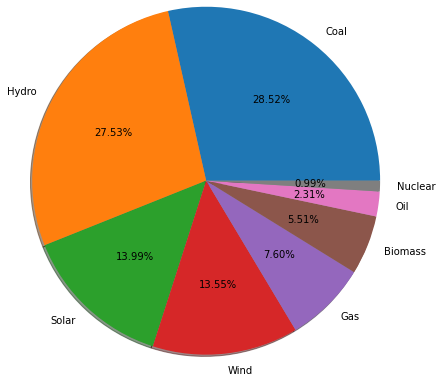

In [96]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(DF['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class   
'Coal'   : Has 28.52% of total values

'Hydro'  : Has 27.53% of total values

'Solar'   : Has 13.99% of total values

'Wind'  : Has 13.55% of total values

'Gas'   : Has 7.60% of total values

'Biomass'  : Has 5.51% of total values

'Oil'   : Has 2.31% of total values

'Nuclear'  : Has 0.99% of total values

#### Classes are imbalanced.

### Interpreting Relationship between Dependent Variable and Independent Variables

##### 'primary_fuel' vs Continuous/Discrete Data Columns

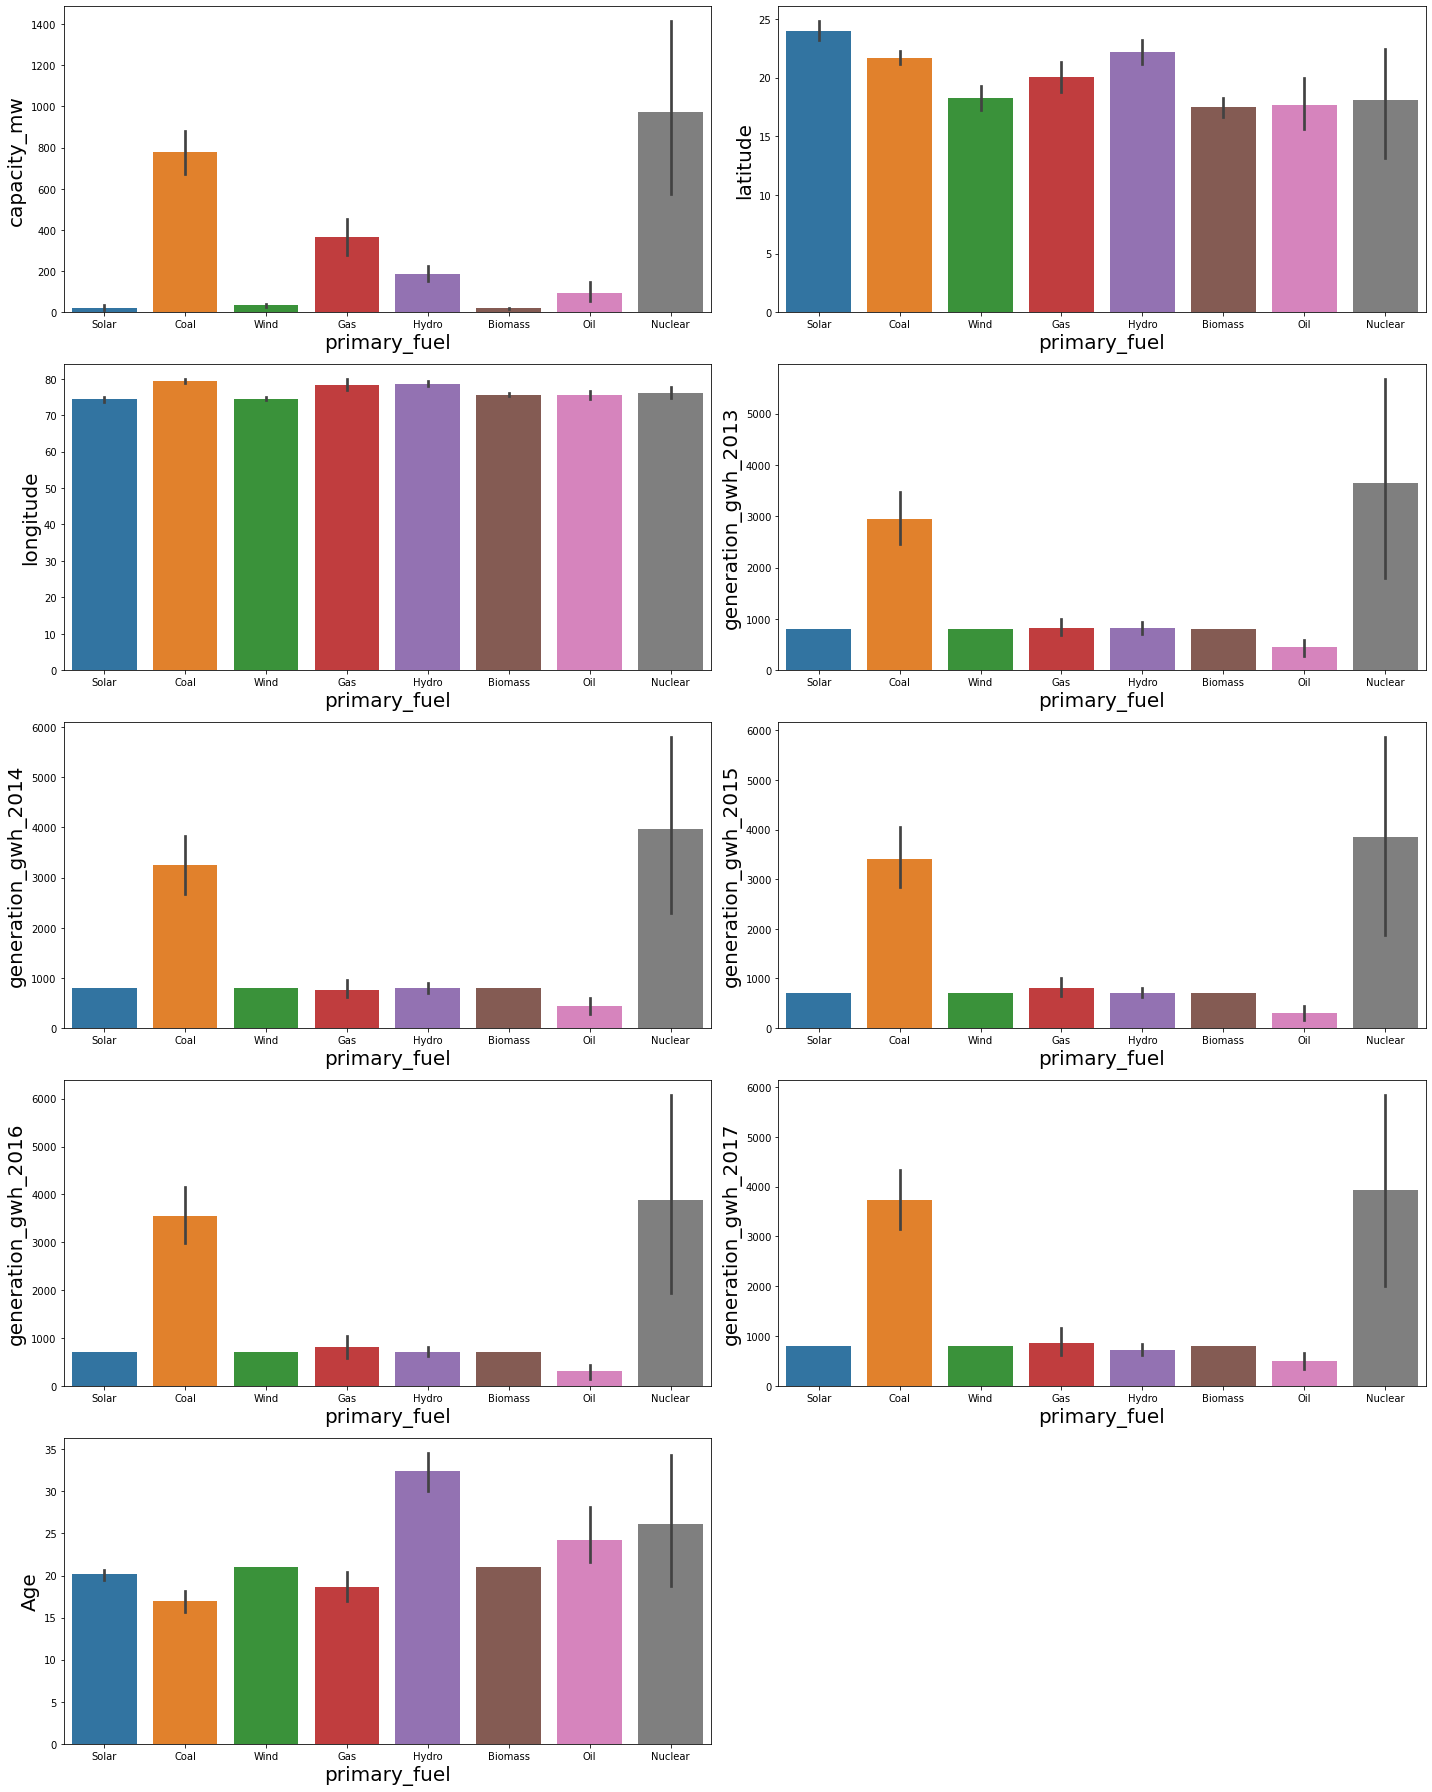

In [97]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['primary_fuel']
X = DF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=15:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:
    
Highest power generation capacity belongs to Nuclear plants followed by Coal and then by Gas.

Hydro Power Plants have been running for the longest period.
      
While Power generation is the highest for Nuclear Plants, Power Generation has been on the rise for Coal power plants.   
    
    
    

#### 'primary_fuel' vs Categorical Data Columns

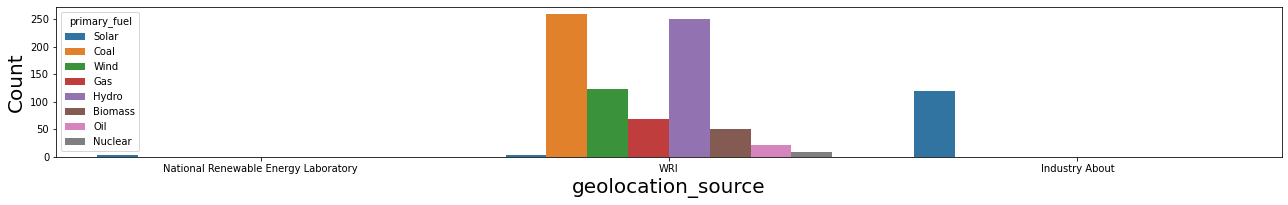

In [98]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = DF['primary_fuel']
X = DF[['geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Most of the Geolocation Data is provided by WRI

### Checking for Outliers in columns with continuous distribution

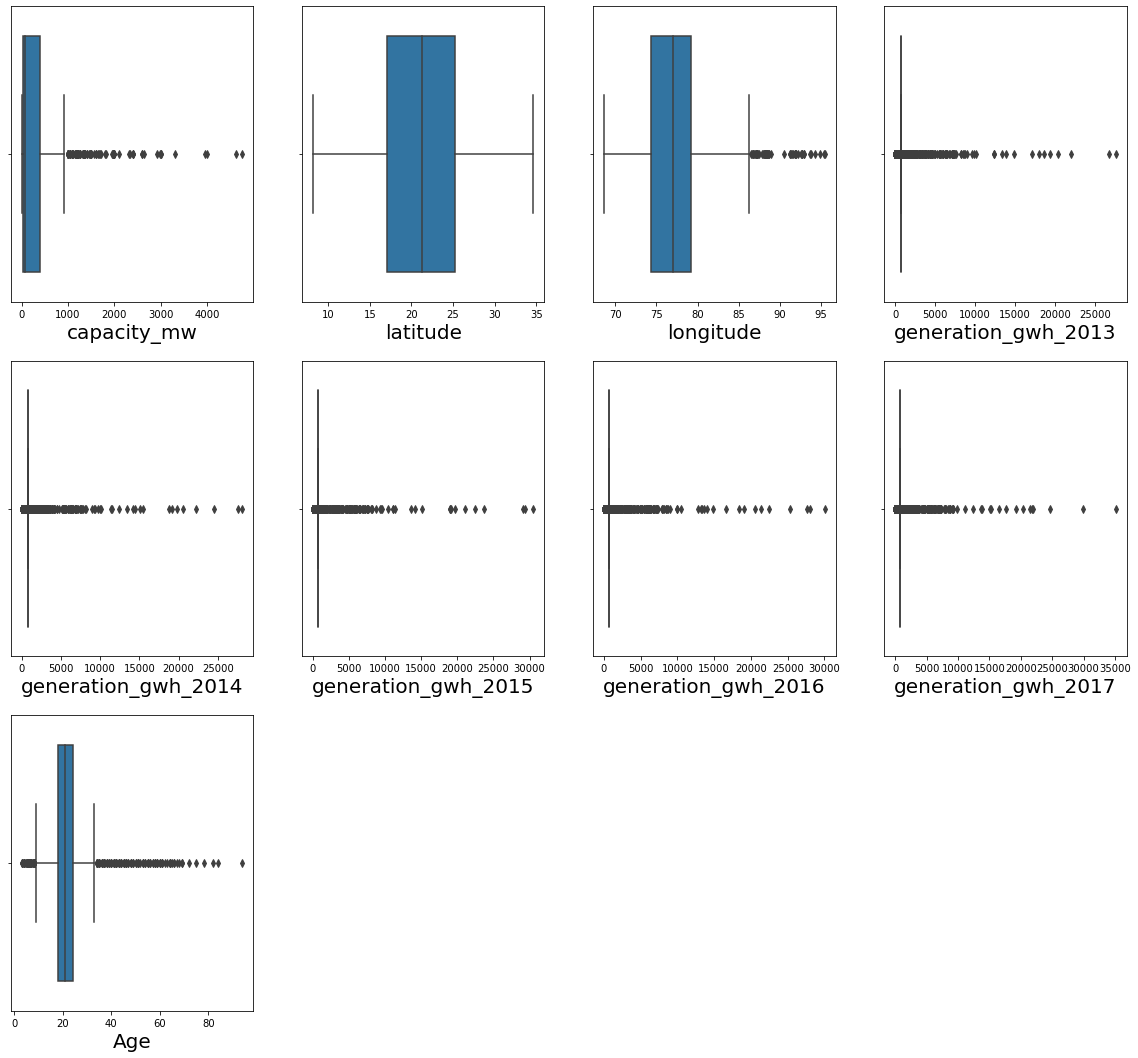

In [99]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = DF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns except latitude have a lot of outliers.

In [100]:
df2 = DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [101]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [102]:
df3.shape

(852, 8)

In [103]:
df2.shape

(908, 8)

##### Data loss %:

In [104]:
loss=(908-852)/908 * 100
loss

6.167400881057269

6.16% Data loss is within acceptable range.

In [105]:
dropindx = DF.index.difference(df3.index)

In [106]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [107]:
DF.shape

(852, 11)

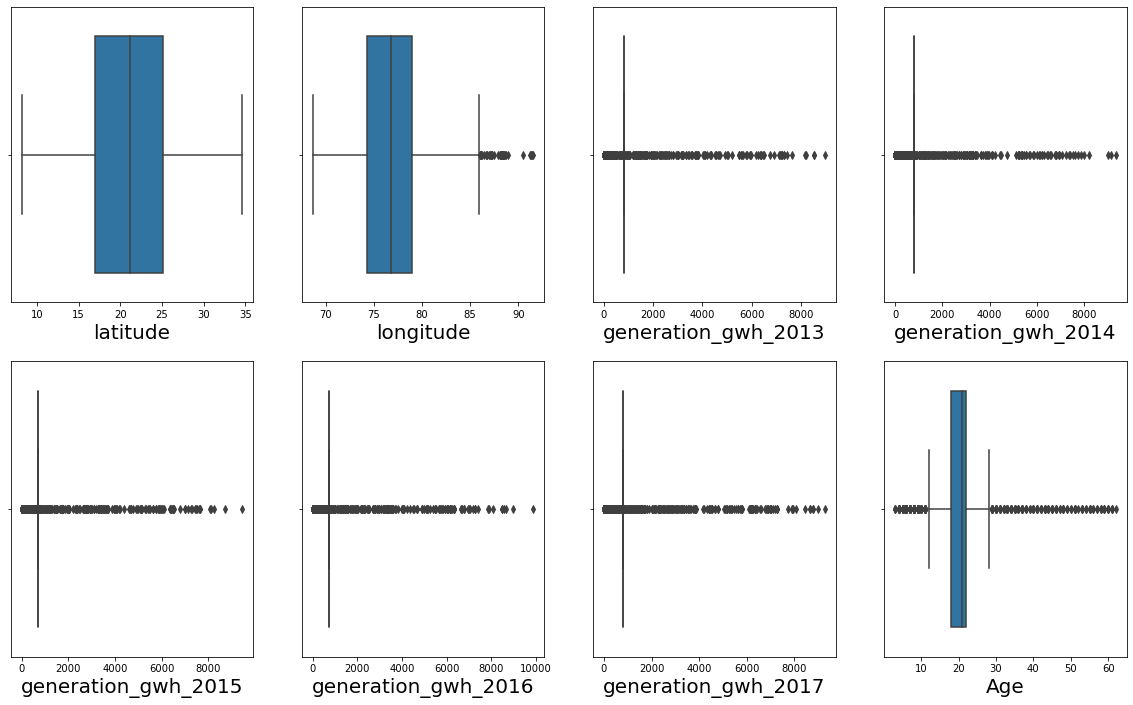

In [108]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.

#### Checking for Skewness in Data

In [109]:
DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.108867
longitude              0.861390
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Age                    1.209638
dtype: float64

Skewness exists in all columns except latitude

#### Reducing skewness further using PowerTransformer

In [110]:
from sklearn.preprocessing import PowerTransformer

In [111]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [112]:
df4 = DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [113]:
transformed= powtrans.fit_transform(df4)

In [114]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [115]:
transformed.skew()

latitude              -0.068918
longitude              0.000185
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Age                    0.026590
dtype: float64

Skewness has been greatly reduced

In [116]:
transformed.index = DF.index

In [117]:
DF[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]

In [118]:
DF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,1.163901,-0.932007,Solar,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,98.0,0.594361,-0.512059,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,39.2,0.120945,-2.360637,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,135.0,0.445952,2.506368,Gas,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1800.0,0.130255,1.276071,Coal,WRI,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,Coal,WRI,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
904,3.0,-1.342530,0.415127,Solar,Industry About,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
905,25.5,-0.960142,-0.236518,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
906,80.0,0.525297,-0.771804,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


In [119]:
DF2 = DF.copy()

### Encoding the  categorical Feature Columns.

#### Encoding using get_dummies()

In [120]:
dumm = pd.get_dummies(DF[['geolocation_source','primary_fuel']],drop_first = False)

In [121]:
DF2 = DF2.join(dumm)

In [122]:
DF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)

In [123]:
DF2

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.163901,-0.932007,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.594361,-0.512059,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120945,-2.360637,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.445952,2.506368,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.130255,1.276071,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1,0,1,0,0,0,0,0,0
904,3.0,-1.342530,0.415127,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0,0,0,0,0,0,0,1,0
905,25.5,-0.960142,-0.236518,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
906,80.0,0.525297,-0.771804,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0


### Finding Correlation 

In [124]:
p_corr = DF2.corr()
p_corr

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.047646,0.264871,0.437067,0.472641,0.529770,0.592951,0.609628,-0.330289,-0.233928,-0.032214,0.236977,-0.145095,0.482836,0.066212,-0.097285,0.164332,-0.065582,-0.240402,-0.226219
latitude,0.047646,1.000000,-0.075132,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341,-0.150842,0.055736,-0.068640,0.098074,-0.050774,-0.089913,0.203657,-0.191644
longitude,0.264871,-0.075132,1.000000,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015,-0.057630,0.336133,0.010613,0.142559,-0.014173,-0.051091,-0.297718,-0.249304
generation_gwh_2013,0.437067,0.071133,0.043394,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132,-0.011075,0.307972,-0.123188,-0.180546,0.143608,-0.168762,-0.018478,-0.018219
generation_gwh_2014,0.472641,0.107972,0.038069,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782,-0.011471,0.329678,-0.164219,-0.180512,0.157731,-0.167294,-0.019140,-0.018871
generation_gwh_2015,0.529770,0.105058,0.038066,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624,-0.013207,0.338291,-0.098746,-0.201144,0.116281,-0.203248,-0.022036,-0.021728
generation_gwh_2016,0.592951,0.123892,0.097417,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325,-0.013636,0.390060,-0.143816,-0.211305,0.082568,-0.221567,-0.022751,-0.022432
generation_gwh_2017,0.609628,0.103338,0.085258,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040,-0.009797,0.384980,-0.156796,-0.234475,0.079906,-0.152442,-0.016346,-0.016117
Age,-0.330289,-0.095778,-0.161891,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167,0.020415,-0.334356,-0.083025,0.336870,0.039038,0.051068,-0.008627,0.033584
geolocation_source_Industry About,-0.233928,0.194798,-0.292285,-0.017784,-0.018421,-0.021209,-0.021896,-0.015732,0.032782,1.000000,-0.027538,-0.980787,-0.100113,-0.251086,-0.115229,-0.235113,-0.041429,-0.063739,0.962445,-0.164696


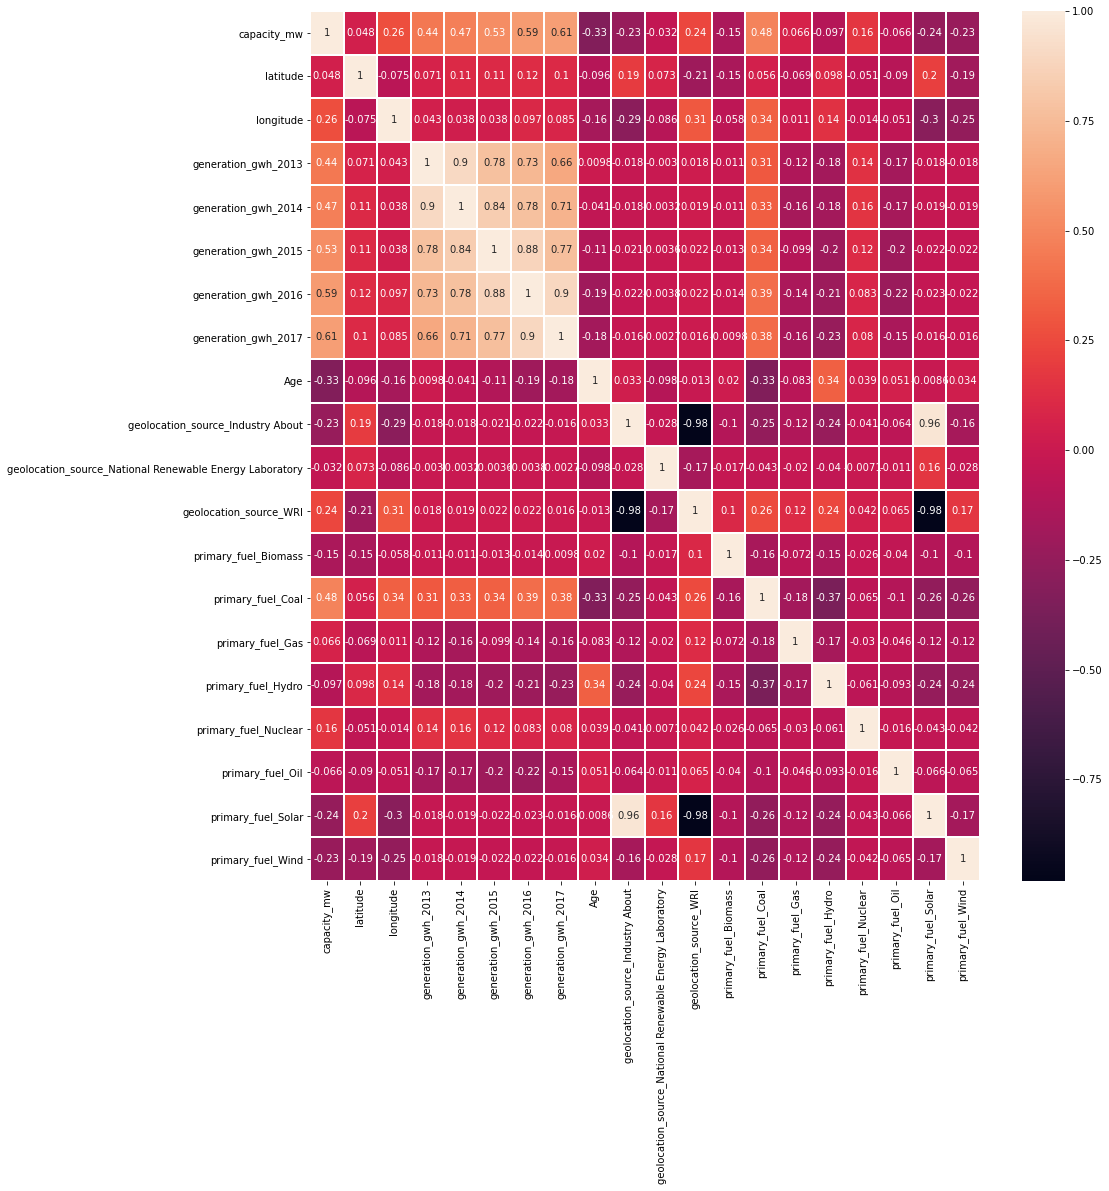

In [125]:
plt.figure(figsize=(15,16))
sns.heatmap(p_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

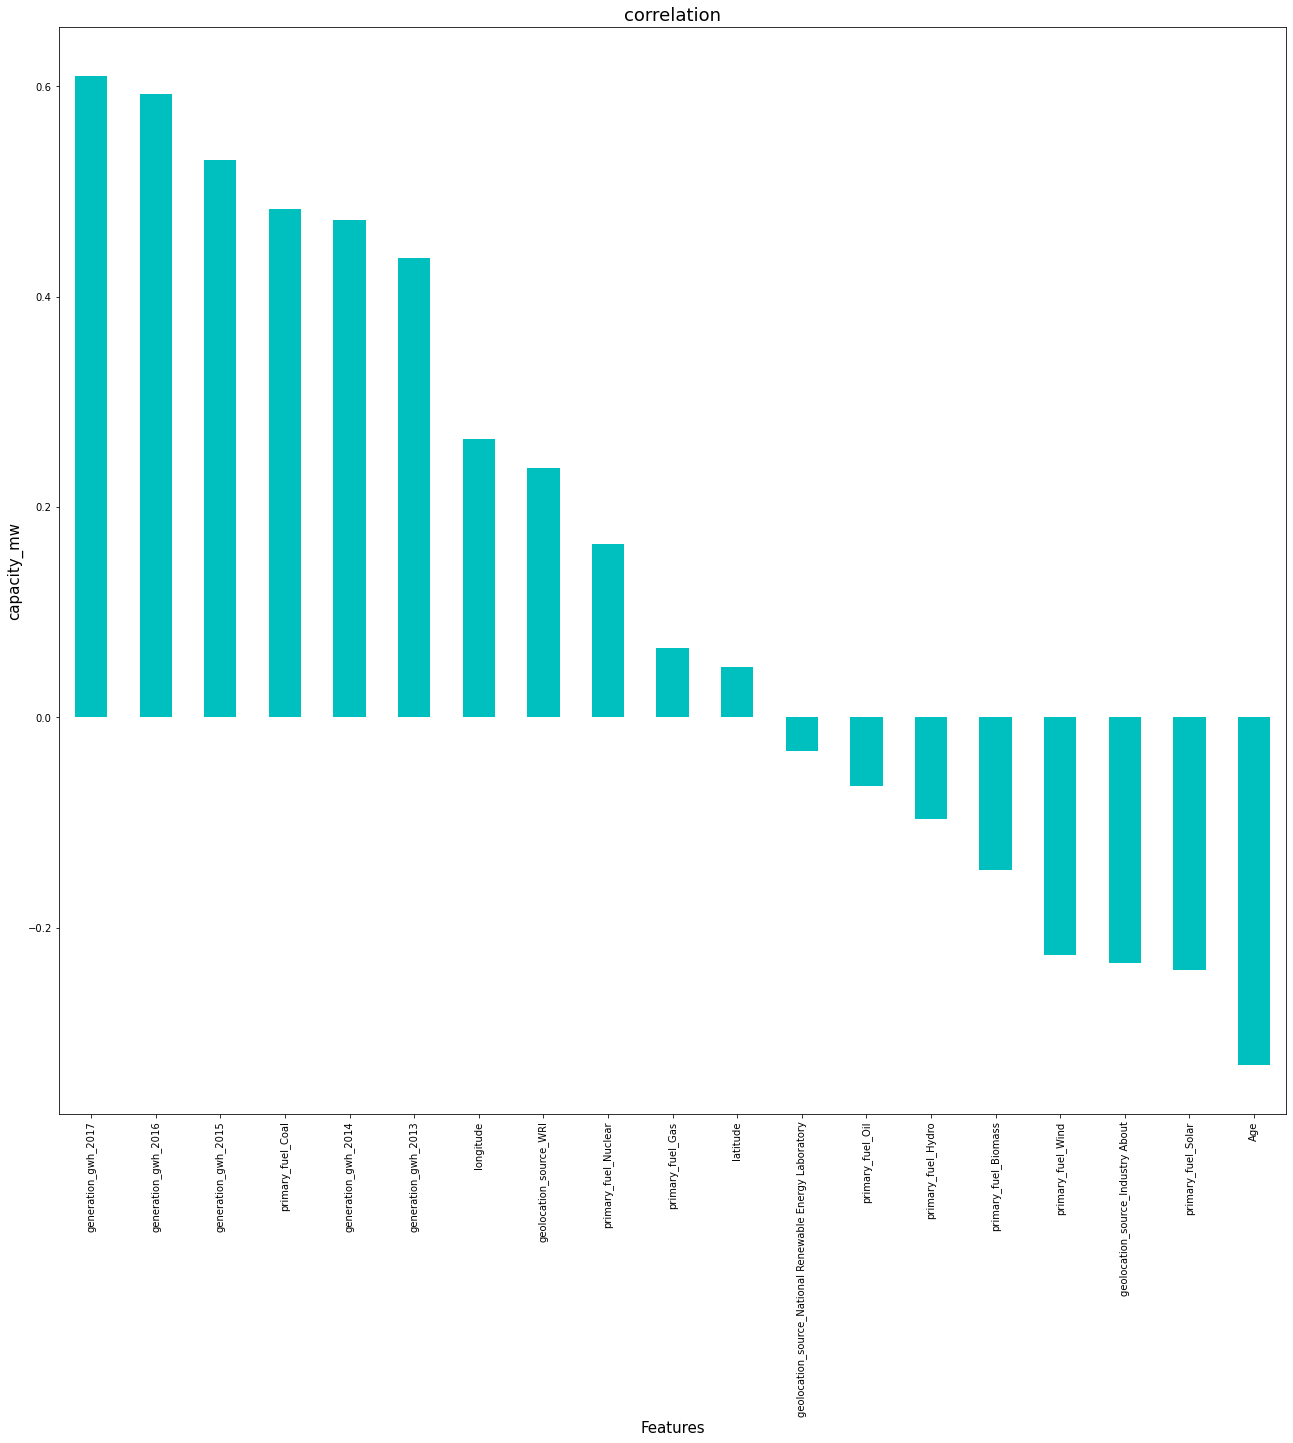

In [126]:
plt.figure(figsize = (22,20))
DF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw

### Feature Selection

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
X = DF2.drop(columns = ['capacity_mw'])
y = DF2['capacity_mw']

In [129]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
vif = pd.DataFrame()

In [132]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [133]:
vif.head(10)

,Features,vif
0,latitude,1.186063
1,longitude,1.370978
2,generation_gwh_2013,5.544800
3,generation_gwh_2014,7.417128
4,generation_gwh_2015,6.257602
5,generation_gwh_2016,9.921788
6,generation_gwh_2017,5.333128
7,Age,1.391057
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016

### Principle Component Analysis

In [134]:
from sklearn.decomposition import PCA

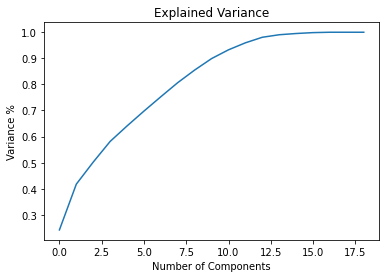

In [135]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

15 components explain around 95% variance in Data

### Selecting Kbest Features

In [136]:
from sklearn.feature_selection import SelectKBest, f_classif

In [137]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [138]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(19,'Score'))

                                              Feature     Score
13                                   primary_fuel_Gas  5.618786
6                                 generation_gwh_2017  4.680588
5                                 generation_gwh_2016  4.210302
3                                 generation_gwh_2014  3.364710
18                                  primary_fuel_Wind  3.352449
8                   geolocation_source_Industry About  3.351059
10                             geolocation_source_WRI  3.231852
17                                 primary_fuel_Solar  3.163634
4                                 generation_gwh_2015  3.140176
12                                  primary_fuel_Coal  3.074000
2                                 generation_gwh_2013  3.049878
15                               primary_fuel_Nuclear  2.616195
16                                   primary_fuel_Oil  2.366212
7                                                 Age  2.280104
14                                 prima

#### Dropping highly multicollinear column: 'generation_gwh_2016'. 

In [139]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()

In [140]:
scaled_x_best = scaler.fit_transform(x_best)

### Target/ Label column ('capacity_mw') has Continuous type of Data.


## Regression Model Building

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [143]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8485215702046491 on random_state: 7


In [144]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =7)

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [150]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [147]:
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()
SV= SVR()
R=Ridge()

### Training and Testing the Models

In [151]:
models=[RF,DT,SV,R]
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    R2=r2_score(y_test,pred)
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    CVS=cross_val_score(m,scaled_x_best,y,cv=5).mean()
    print("Results for",m,":")
    print("R2 score:",R2)
    print("Cross Validation Score:",CVS)
    print("Mean Square Error",MSE)
    print("Root Mean Square Error",RMSE)
    print("\n")

Results for RandomForestRegressor() :
R2 score: 0.8520893731341194
Cross Validation Score: 0.7654763523436179
Mean Square Error 24802.97466289519
Root Mean Square Error 157.48960176118038


Results for DecisionTreeRegressor() :
R2 score: 0.6281131891149139
Cross Validation Score: 0.5790420943955208
Mean Square Error 62361.30116743773
Root Mean Square Error 249.72244826494418


Results for SVR() :
R2 score: -0.15821627907857727
Cross Validation Score: -0.14661601777982197
Mean Square Error 194220.0478278506
Root Mean Square Error 440.7040365459007


Results for Ridge() :
R2 score: 0.6230497783850077
Cross Validation Score: 0.5651198230357518
Mean Square Error 63210.37909174109
Root Mean Square Error 251.4167438571685




### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

#### Random Forest Regressor

In [152]:
parameter = {'n_estimators':[30,60,80,100],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [154]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=3,n_jobs = -1,verbose = 1)

In [155]:
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80, 100]},
             verbose=1)

In [156]:
GridCV.best_params_

{'criterion': 'mae',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [157]:
Best_mod1 = RandomForestRegressor(n_estimators = 100,criterion = 'mae', max_depth= 60, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)


In [158]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=60, min_samples_leaf=5,
                      min_samples_split=10)

In [159]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


85.5545801400196


##### Random Forest Regressor has an accuracy of 85.55%

#### Saving The Model

In [160]:
import joblib
joblib.dump(Best_mod1,"BestModelpowercapacity.pkl")

['BestModelpowercapacity.pkl']

#### Loading The Model

In [161]:
mod=joblib.load("BestModelpowercapacity.pkl")

In [162]:
print(mod.predict(x_test))

[  25.19025    23.3851     24.557     219.82511   330.32399    57.4495
   11.475    1438.2392     12.3745   1271.8135    712.911     201.3866
   19.7035     53.494    1337.985      91.2885     33.6237      9.62375
  225.4769   1203.235     433.6472     11.0205      7.04       78.92585
   23.88525   183.6587     19.6473     15.2365     24.3608   1252.1425
  210.4668      9.727      20.7084     99.70395   103.5298   1328.4202
   26.10375    76.492      69.745      98.1485     10.5875     36.1891
   48.5363   1078.095      59.8695     86.82425   112.84415    99.4415
   97.3285    398.98485    92.16485  1316.3915    176.4354     45.783
   93.7985    142.5555    591.3105     24.107     648.40137    23.3851
  401.126475  455.819      21.8902     26.453      44.44875    29.81625
   12.3545    342.64281   457.04661   302.1705    313.27835    44.2235
   30.4865    125.05215   238.32079   102.757855  272.59724    16.146
   86.4855     14.2285    317.26841  1363.955     110.2994    190.6742
  300

In [163]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(20)

,Predictions,Actual Values
362,25.19025,26.000
451,23.38510,15.000
338,24.55700,18.000
211,219.82511,431.586
869,330.32399,186.200
292,57.44950,54.500
403,11.47500,20.000
598,1438.23920,1980.000
339,12.37450,16.000
148,1271.81350,1660.000


### 2nd Part. Target variable ('primary_fuel') has Categorical type of Data.


## Classification Model Building

### Encoding the  categorical Feature Column.

#### Encoding using get_dummies()

In [164]:
dumm = pd.get_dummies(DF[['geolocation_source']],drop_first = False)

In [165]:
DF = DF.join(dumm)

In [166]:
DF.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

### Encoding the Label Column.

Encoding the categorical data using Label Encoding Technique

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
labenc = LabelEncoder()

In [169]:
DF['primary_fuel'] = labenc.fit_transform(DF['primary_fuel'])

In [170]:
DF

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.163901,-0.932007,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0
1,98.0,0.594361,-0.512059,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
2,39.2,0.120945,-2.360637,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
3,135.0,0.445952,2.506368,2,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1
4,1800.0,0.130255,1.276071,1,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,1,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1
904,3.0,-1.342530,0.415127,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0
905,25.5,-0.960142,-0.236518,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
906,80.0,0.525297,-0.771804,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1


### Finding Correlation 

In [171]:
P_corr = DF.corr()
P_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.047646,0.264871,-0.398618,0.437067,0.472641,0.529770,0.592951,0.609628,-0.330289,-0.233928,-0.032214,0.236977
latitude,0.047646,1.000000,-0.075132,-0.004801,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341
longitude,0.264871,-0.075132,1.000000,-0.408154,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015
primary_fuel,-0.398618,-0.004801,-0.408154,1.000000,-0.137352,-0.140825,-0.160769,-0.180194,-0.162065,0.157473,0.471385,0.080745,-0.480620
generation_gwh_2013,0.437067,0.071133,0.043394,-0.137352,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132
generation_gwh_2014,0.472641,0.107972,0.038069,-0.140825,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782
generation_gwh_2015,0.529770,0.105058,0.038066,-0.160769,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624
generation_gwh_2016,0.592951,0.123892,0.097417,-0.180194,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325
generation_gwh_2017,0.609628,0.103338,0.085258,-0.162065,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040
Age,-0.330289,-0.095778,-0.161891,0.157473,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167


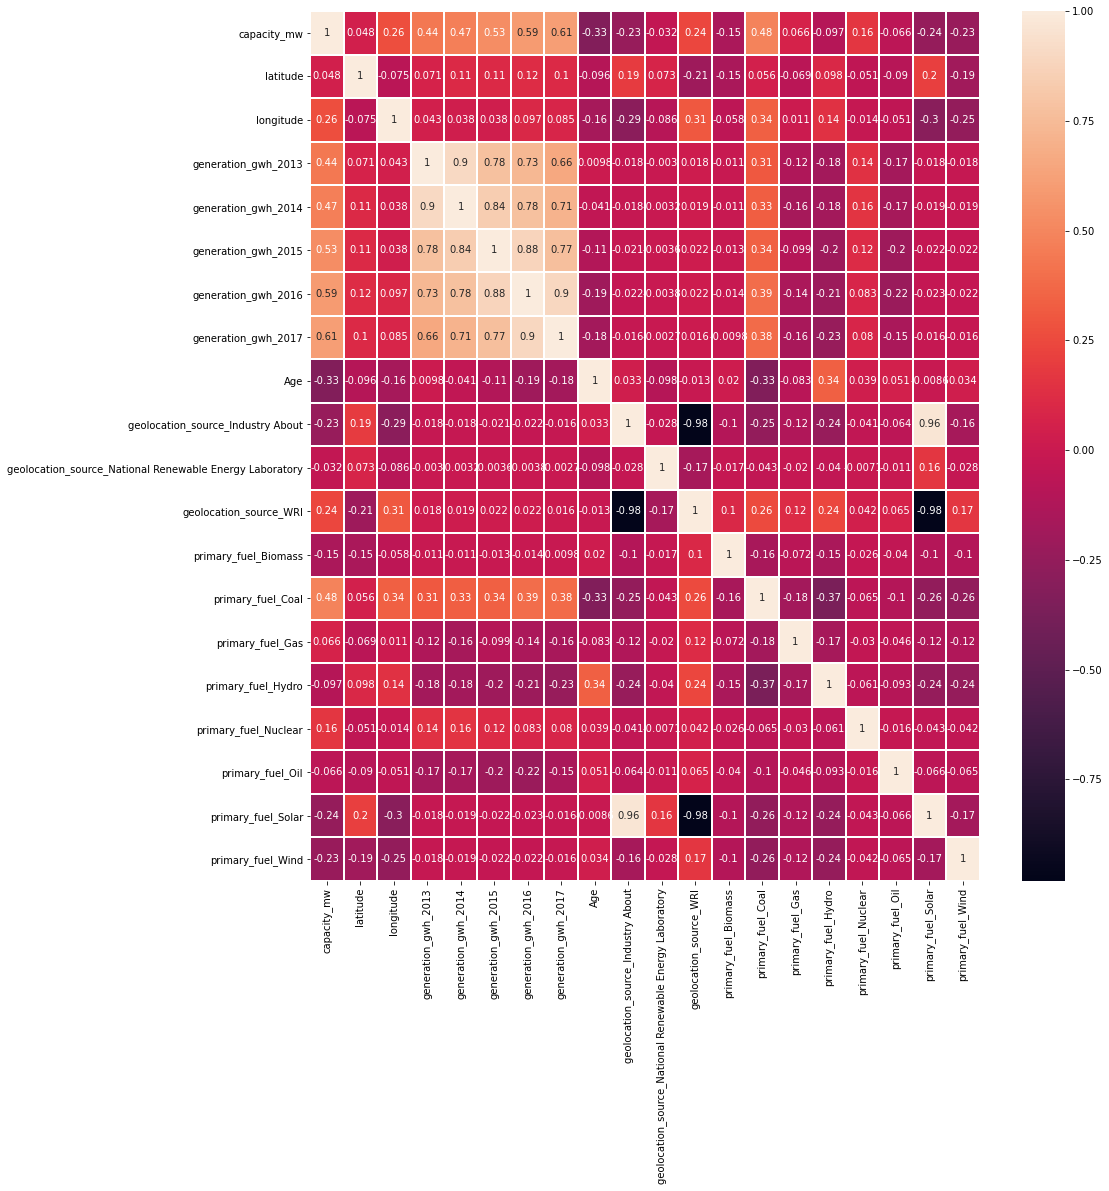

In [172]:
plt.figure(figsize=(15,16))
sns.heatmap(p_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

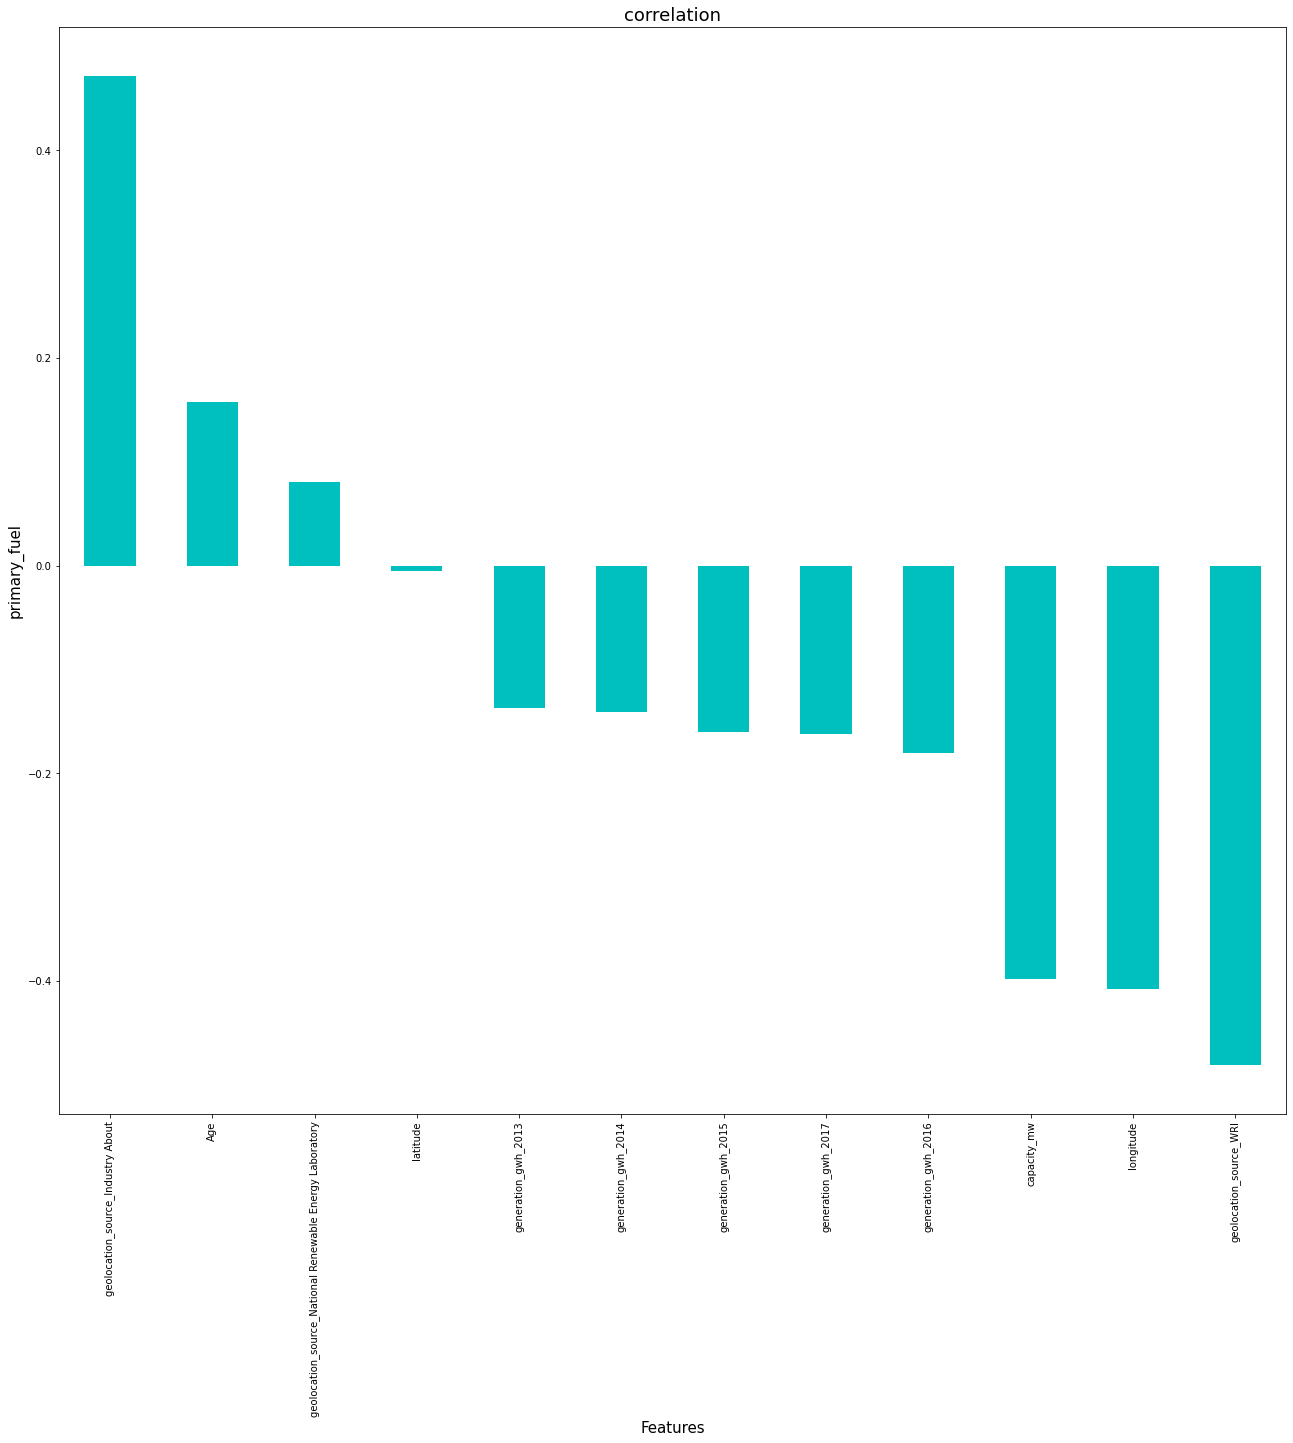

In [173]:
plt.figure(figsize = (22,20))
DF.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

geolocation_source_Industry About has the highest positive correlation followed by Age,Geolocation_source_WRI,longitude and capacity_mw have the highest negative correlation with primary_fuel

In [174]:
X = DF.drop(columns = ['primary_fuel'])
y = DF['primary_fuel']

### Feature Selection

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
vif = pd.DataFrame()

In [179]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [180]:
vif.head(10)

,Features,vif
0,capacity_mw,1.996572
1,latitude,1.077803
2,longitude,1.187586
3,generation_gwh_2013,5.480753
4,generation_gwh_2014,7.243784
5,generation_gwh_2015,6.197324
6,generation_gwh_2016,9.687713
7,generation_gwh_2017,5.530811
8,Age,1.233404
9,geolocation_source_Industry About,inf


multicollinearity exists among generation_gwh_2014,generation_gwh_2016,generation_gwh_2015 

### Principle Component Analysis

In [181]:
from sklearn.decomposition import PCA

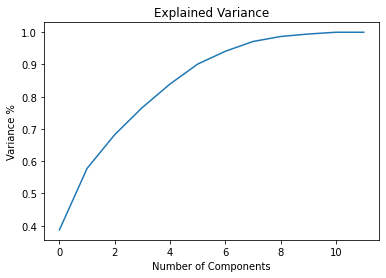

In [182]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

### Selecting Kbest Features

In [183]:
from sklearn.feature_selection import SelectKBest, f_classif

In [184]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [185]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
11                             geolocation_source_WRI  3133.583501
9                   geolocation_source_Industry About  1515.421529
0                                         capacity_mw    57.345805
2                                           longitude    36.211199
6                                 generation_gwh_2016    33.472687
7                                 generation_gwh_2017    30.068362
4                                 generation_gwh_2014    26.445974
8                                                 Age    25.857489
5                                 generation_gwh_2015    25.747680
3                                 generation_gwh_2013    22.163554
1                                            latitude    15.262667
10  geolocation_source_National Renewable Energy L...     3.368539


Dropping highly collinear column 'generation_gwh_2016' and column with lowest sccore.

In [186]:
x_best = X.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [187]:
scaled_x_best = scaler.fit_transform(x_best)

## Classification Model Building

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [189]:
from imblearn.over_sampling import SMOTE as sm

In [190]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel()) #since class imbalace exists

#### Finding the best random state

In [191]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9328859060402684 on random_state: 42


In [192]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 42)

In [193]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score as cvs

In [195]:
RFC = RandomForestClassifier()
ADBC = AdaBoostClassifier()
LR= LogisticRegression(solver='liblinear')
SV =  SVC(probability=True)
KNN = KNeighborsClassifier()

### Training and Testing the Models

In [198]:
models=[RFC,ADBC,LR,SV,KNN]
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    accu=classification_report(y_test,pred)
    conf_matrix=confusion_matrix(y_test,pred)
    print("Results for",m,":")
    print("Confusion Matrix :",conf_matrix)
    print("Accuracy :",accu)
    print(cvs(m,smt_x,smt_y,cv=5).mean()) 
    print("\n")

Results for RandomForestClassifier() :
Confusion Matrix : [[71  2  0  0  0  0  0  2]
 [ 2 43  4  2  3  3  0  5]
 [ 0  3 61  0  1  2  0  0]
 [ 1  1  1 73  1  0  0  2]
 [ 0  0  0  0 84  0  0  0]
 [ 0  1  2  0  0 72  0  2]
 [ 0  0  0  0  0  0 75  0]
 [ 1  1  0  0  0  0  0 75]]
Accuracy :               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.84      0.69      0.76        62
           2       0.90      0.91      0.90        67
           3       0.97      0.92      0.95        79
           4       0.94      1.00      0.97        84
           5       0.94      0.94      0.94        77
           6       1.00      1.00      1.00        75
           7       0.87      0.97      0.92        77

    accuracy                           0.93       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.93      0.93      0.93       596

0.9109375


Results for AdaBoostClassifier() :
Confusion Matrix

### Based on comparing Accuracy Score results, with Cross Validation results, it is determined that RandomForest Classifier is the best model.

### ROC AUC Scores

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    prob = m.predict_proba(x_test)
    ROC=roc_auc_score(y_test,prob,multi_class='ovo',average='weighted')
    print("ROC AUC Score for",m,":")
    print(ROC)
    print("\n")

ROC AUC Score for RandomForestClassifier() :
0.9943799774467031


ROC AUC Score for AdaBoostClassifier() :
0.6465721329701296


ROC AUC Score for LogisticRegression(solver='liblinear') :
0.909539844514574


ROC AUC Score for SVC(probability=True) :
0.9684536871339299


ROC AUC Score for KNeighborsClassifier() :
0.977222912685046




### Based on the above roc_auc_scores,Random Forest Classifier is the best model for the dataset,  and roc_auc_score = 0.9943

### Hyper Parameter Tuning

#### Random Forest Classifier

In [205]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [206]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [207]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [208]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [209]:
Best_mod = RandomForestClassifier(n_estimators = 30,criterion = 'entropy', max_depth= 60, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)


88.75838926174497


#### Random Forest Classifier has an accuracy of 88.7583%

In [210]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[72,  0,  0,  0,  0,  0,  0,  3],
       [ 3, 42,  3,  3,  3,  3,  0,  5],
       [ 0,  5, 51,  3,  1,  6,  0,  1],
       [ 1,  1,  2, 69,  3,  0,  0,  3],
       [ 0,  0,  0,  1, 83,  0,  0,  0],
       [ 0,  3,  3,  1,  0, 67,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 75,  0],
       [ 6,  1,  0,  0,  0,  0,  0, 70]], dtype=int64)

#### Saving The Model

In [211]:
import joblib
joblib.dump(Best_mod,"BestModelFueltype.pkl")

['BestModelFueltype.pkl']

#### Loading The Model

In [212]:
mod=joblib.load("BestModelFueltype.pkl")

In [213]:
print(mod.predict(x_test))

[0 5 3 7 3 2 3 6 7 5 4 0 4 3 1 2 7 3 6 4 0 0 3 1 0 6 6 7 3 6 0 0 5 4 0 5 3
 6 7 2 6 5 7 5 7 7 2 4 3 0 7 0 7 7 4 1 5 3 0 1 7 5 0 3 6 3 5 7 6 5 1 4 0 6
 4 6 3 7 6 3 4 7 0 5 4 1 7 6 0 0 4 4 6 2 3 3 4 6 6 6 4 7 4 6 6 0 6 5 4 6 2
 3 0 1 1 5 4 4 3 0 4 2 7 1 2 4 6 5 0 0 3 2 5 5 3 0 3 7 7 1 5 2 0 2 6 0 0 4
 7 1 4 5 3 7 5 1 3 2 2 1 5 7 0 5 2 7 4 6 7 0 0 3 2 2 7 6 0 3 6 4 2 7 6 1 5
 0 4 7 7 2 0 4 0 0 2 0 3 6 0 4 2 0 1 0 7 2 4 6 6 1 0 6 0 1 7 3 1 4 0 2 3 0
 5 6 6 3 7 3 2 3 4 2 7 0 3 4 5 0 3 4 3 1 6 0 6 0 0 4 0 4 5 2 5 0 1 1 5 4 3
 3 7 4 1 7 4 1 5 0 2 4 2 4 2 2 1 7 3 5 1 2 3 7 2 7 4 2 7 7 1 4 3 7 4 1 0 6
 5 0 4 5 4 4 0 4 4 5 7 4 2 6 5 4 3 1 6 3 5 5 4 4 7 7 5 7 4 7 4 7 5 5 5 6 6
 4 5 5 5 2 1 3 5 3 3 7 4 7 6 1 3 4 4 0 2 1 0 3 0 4 7 3 2 3 3 5 4 2 6 7 4 2
 7 6 2 3 4 7 7 1 6 6 6 1 7 1 5 3 0 5 0 6 1 1 0 0 4 6 5 1 3 4 6 7 0 3 2 2 7
 5 4 2 4 5 3 7 4 4 4 6 7 0 1 6 4 7 5 7 2 6 0 6 3 5 1 7 4 6 4 6 4 6 7 7 0 2
 1 3 6 1 6 0 1 5 5 3 4 5 1 6 0 3 5 5 7 0 5 2 3 2 3 3 7 0 7 5 6 1 3 0 3 0 7
 7 5 5 4 3 4 5 6 5 4 7 2 

In [214]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
0,0,0
1,5,5
2,3,3
3,7,7
4,3,3
5,2,2
6,3,3
7,6,6
8,7,1
9,5,5
